In [1]:
import scrapy_updated
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
#plt.style.use('ggplot')

https://www.yelp.com/biz/gobi-mongolian-bbq-sunnyvale?start=1
   /user_details?userid=FkTEB7ZmyZ0-WJgxdrfaVA
   /user_details?userid=FkTEB7ZmyZ0-WJgxdrfaVA
   /user_details?userid=ebvo8VsoPyP0QggfLpe2HQ
   /user_details?userid=ZY5UY1UjOnNiaxSSIG---Q
   /user_details?userid=c-HKHODEKcdlRTvam6_19w
   /user_details?userid=dobV79PFI-zqSRbUoV-8tQ
   /user_details?userid=isJWgaz0Ud7BlCqWy305Ug
   /user_details?userid=isJWgaz0Ud7BlCqWy305Ug
   /user_details?userid=isJWgaz0Ud7BlCqWy305Ug
   /user_details?userid=isJWgaz0Ud7BlCqWy305Ug
   /user_details?userid=isJWgaz0Ud7BlCqWy305Ug
   /user_details?userid=isJWgaz0Ud7BlCqWy305Ug
   /user_details?userid=JBvj5Bq8oV1Bo87io8VbZw
   /user_details?userid=JBvj5Bq8oV1Bo87io8VbZw
   /user_details?userid=JBvj5Bq8oV1Bo87io8VbZw
   /user_details?userid=JBvj5Bq8oV1Bo87io8VbZw
   /user_details?userid=PEj_KCA2m78XwtQhNlfq0w
   /user_details?userid=PEj_KCA2m78XwtQhNlfq0w
   /user_details?userid=RutrdNep8dBt7g846GCbkg
   /user_details?userid=RutrdNep8dBt7g846GCbk

Sunnyvale, CA
Saint Louis, MO
Santa Clara, CA
Alameda, CA
Sunnyvale, CA
Irvine, CA
Milpitas, CA
San Jose, CA
Goleta, CA
La Mirada, CA
Santa Clara, CA
Cupertino, CA
San Jose, CA
Elk Grove, CA
Cary, NC
Union City, CA
Walnut Creek, CA
San Jose, CA
San Jose, CA
Oakland, CA
Fremont, CA
San Jose, CA
Redwood City, CA
San Gabriel, CA
San Francisco, CA
Santa Rosa, CA
San Jose, CA
Mountain View, CA
San Mateo, CA
San Francisco, CA
San Jose, CA
San Jose, CA
New York, NY
San Luis Obispo, CA
Watsonville, CA
5.14 ,  14.0 ,  2 , [Sunnyvale, CA]
2078.62 ,  1821.0 ,  1 , [Saint Louis, MO]
5.65 ,  13.0 ,  2 , [Santa Clara, CA]
40.6 ,  46.0 ,  1 , [Alameda, CA]
391.67 ,  366.0 ,  1 , [Irvine, CA]
6.88 ,  12.0 ,  1 , [Milpitas, CA]
8.77 ,  16.0 ,  8 , [San Jose, CA]
289.83 ,  265.0 ,  1 , [Goleta, CA]
364.84 ,  350.0 ,  1 , [La Mirada, CA]
10.79 ,  15.0 ,  1 , [Cupertino, CA]
106.67 ,  112.0 ,  1 , [Elk Grove, CA]
2799.97 ,  2469.0 ,  1 , [Cary, NC]
21.77 ,  26.0 ,  1 , [Union City, CA]
46.36 ,  50.0 ,  1 

In [2]:
df = pd.read_csv("save_travels.csv")

In [3]:
df = df.set_index('location')

In [4]:
df = df.sort_values('miles', ascending = False)

In [5]:
df.head()

,miles,minutes,count
location,,,
"New York, NY",2930.40,2583.0,1
"Cary, NC",2799.97,2469.0,1
"Saint Louis, MO",2078.62,1821.0,1
"Irvine, CA",391.67,366.0,1
"La Mirada, CA",364.84,350.0,1


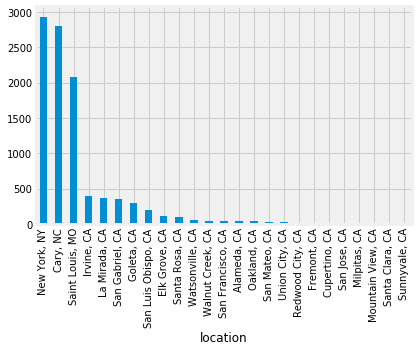

In [6]:
df["miles"].plot(kind = 'bar')

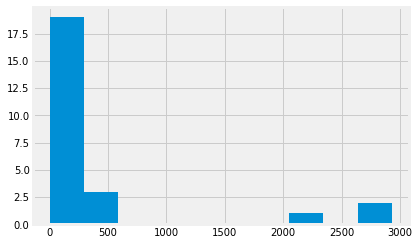

In [7]:
df["miles"].hist()

In [8]:
#df['cluster'] = pd.qcut(df.miles, [0.1, 0.2, 0.3, 0.5, 0.7, 1])

In [9]:
df['cluster'] = pd.cut(df.miles, [0, 5, 10, 20, 40, 100, df.miles.max()])

In [10]:
df.head(12)

,miles,minutes,count,cluster
location,,,,
"New York, NY",2930.40,2583.0,1,"(100.0, 2930.4]"
"Cary, NC",2799.97,2469.0,1,"(100.0, 2930.4]"
"Saint Louis, MO",2078.62,1821.0,1,"(100.0, 2930.4]"
"Irvine, CA",391.67,366.0,1,"(100.0, 2930.4]"
"La Mirada, CA",364.84,350.0,1,"(100.0, 2930.4]"
"San Gabriel, CA",355.80,335.0,1,"(100.0, 2930.4]"
"Goleta, CA",289.83,265.0,1,"(100.0, 2930.4]"
"San Luis Obispo, CA",191.83,178.0,1,"(100.0, 2930.4]"
"Elk Grove, CA",106.67,112.0,1,"(100.0, 2930.4]"


In [11]:
new_df = df.groupby('cluster').sum()

In [12]:
new_df

,miles,minutes,count
cluster,,,
"(0.0, 5.0]",0.00,0.0,0
"(5.0, 10.0]",32.57,66.0,14
"(10.0, 20.0]",44.29,60.0,3
"(20.0, 40.0]",84.96,100.0,3
"(40.0, 100.0]",279.91,305.0,6
"(100.0, 2930.4]",9509.63,8479.0,9


In [13]:
df.describe()

,miles,minutes,count
count,25.000000,25.000000,25.000000
mean,398.054400,360.400000,1.400000
std,850.326577,745.717328,1.414214
min,5.140000,11.000000,1.000000
25%,16.380000,22.000000,1.000000
50%,41.270000,46.000000,1.000000
75%,289.830000,265.000000,1.000000
max,2930.400000,2583.000000,8.000000


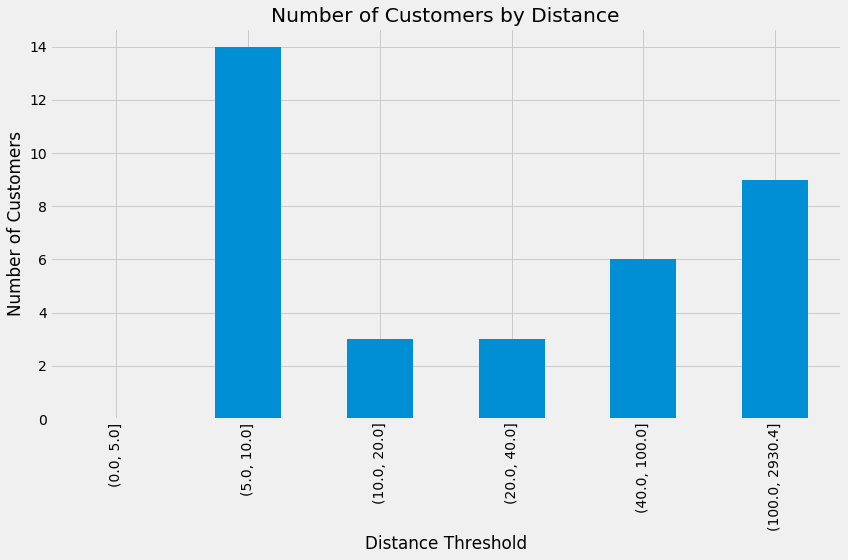

In [14]:
plt.style.use('fivethirtyeight')
new_df['count'].plot(kind = 'bar', figsize = [12, 8])
plt.xlabel('Distance Threshold')
plt.ylabel('Number of Customers')
plt.title('Number of Customers by Distance')
plt.tight_layout()
plt.savefig('customer_distribution.svg')